In [16]:
import numpy as np
import sympy as sym

# The objective of this project was to simulate a gravitational N-body problem using multistep methods. 

# 2. Multistep methods
In general, as is exposed in theory, the coefficients for a k-1 points are given by $$\sum_{i=1}^{k-1} \int_{t_n}^{t_{n+1}}\mathcal{L}_i(x) \,dx $$ In this case, $\mathcal{L}_i(x)$ refers to the Lagrange polynomial: $$ \mathcal{L}_i(x) = \prod_{j=0, j \neq i} ^{k-1} \frac{x - x_j}{x_i - x_j}\ $$
To calculate the Adam-Bashforth coefficients we'll apply this result.

## Three-dot Adams-Bashforth 

We have the points $(f_n,t_n)$, $(f_{n-1},t_{n-1})$ and $(f_{n-2},t_{n-2})$. Taking h as $t_{n} - t_{n-1}$, $t_{n \pm i} = \pm ih$ and $t_n = 0$, we have that the Lagrange polynomials are 
$$
\left(\frac{t - t_{n-1}}{h}\right)\left(\frac{t - t_{n-2}}{2h}\right), 
\left(\frac{t - t_{n}}{-h}\right)\left(\frac{t - t_{n-2}}{h}\right),
\left(\frac{t - t_{n}}{-2h}\right)\left(\frac{t - t_{n-1}}{-h}\right)
$$
Thus, we obtain the coefficients with the following integration:

In [17]:
t = sym.Symbol('t', Real=True)
h = sym.Symbol('h', Real=True)

In [18]:
f1 = (t - (-h))*(t - (-2*h))/(2*(h**2))
f2 = -(t)*(t - (-2*h))/(h**2)
f3 =(t)*(t - (-h))/(2*(h**2))

In [19]:
int1 = integrate(f1, (t, 0, h))
int2 = integrate(f2, (t, 0, h))
int3 = integrate(f3, (t, 0, h))
print(int1,int2,int3)

23*h/12 -4*h/3 5*h/12


## Four-point Adams-Bashforth 

We have the following points $(f_n,t_n)$, $(f_{n-1},t_{n-1})$, $(f_{n-2},t_{n-2})$ and $(f_{n-3},t_{n-3})$. Taking h as $t_{n} - t_{n-1}$, $t_{n \pm i} = \pm ih$ and $t_n = 0$, we get that the Lagrange polynomials are
$$
\left(\frac{t - t_{n-1}}{h}\right)\left(\frac{t - t_{n-2}}{2h}\right)\left(\frac{t - t_{n-3}}{3h}\right), 
\left(\frac{t - t_{n}}{-h}\right)\left(\frac{t - t_{n-2}}{h}\right)\left(\frac{t - t_{n-3}}{2h}\right),
\left(\frac{t - t_{n}}{-2h}\right)\left(\frac{t - t_{n-1}}{-h}\right)\left(\frac{t - t_{n-3}}{h}\right),
\left(\frac{t - t_{n}}{-3h}\right)\left(\frac{t - t_{n-1}}{-2h}\right)\left(\frac{t - t_{n-2}}{-h}\right)
$$
Given this, the coefficients are obtained with the following integration:

In [20]:
f1 = (t - (-h))*(t - (-2*h))*(t - (-3*h))/(6*(h**3))
f2 = -(t)*(t - (-2*h))*(t - (-3*h))/(2*h**3)
f3 =(t)*(t - (-h))*(t - (-3*h))/(2*(h**3))
f4 = -(t)*(t - (-h))*(t - (-2*h))/(6*(h**3))

In [21]:
int1 = integrate(f1, (t, 0, h))
int2 = integrate(f2, (t, 0, h))
int3 = integrate(f3, (t, 0, h))
int4 = integrate(f4, (t, 0, h))
print(int1,int2,int3,int4)

55*h/24 -59*h/24 37*h/24 -3*h/8


## Three-point Adams-Moulton 

We have the points $(f_{n+1},t_{n+1})$, $(f_{n},t_{n})$ and $(f_{n-1},t_{n-1})$, where $f_{n+1}$ is calculated with the Adams-Bashforth method. Taking h as $t_{n} - t_{n-1}$, $t_{n \pm i} = \pm ih$ and $t_n = 0$, we get the following Lagrange polynomials: 
$$
\left(\frac{t - t_{n}}{h}\right)\left(\frac{t - t_{n-1}}{2h}\right), 
\left(\frac{t - t_{n+1}}{-h}\right)\left(\frac{t - t_{n-1}}{h}\right),
\left(\frac{t - t_{n+1}}{-2h}\right)\left(\frac{t - t_{n}}{-h}\right)
$$
Thus, we obtain the coefficients with the following integral:

In [23]:
f1 = t*(t - (-h))/(2*(h**2))
f2 = -(t - (h))*(t - (-h))/(h**2)
f3 =(t)*(t - (h))/(2*(h**2))

In [24]:
int1 = integrate(f1, (t, 0, h))
int2 = integrate(f2, (t, 0, h))
int3 = integrate(f3, (t, 0, h))
print(int1,int2,int3)

5*h/12 2*h/3 -h/12


## Four-point Adams-Moulton 

We have the points $(f_{n+1},t_{n+1})$, $(f_{n},t_{n})$, $(f_{n-1},t_{n-1})$ and $(f_{n-2},t_{n-2})$, where $f_{n+1}$ is calculated with the Adams-Bashforth method. Taking h as $t_{n} - t_{n-1}$, $t_{n \pm i} = \pm ih$ and $t_n = 0$, we get the following Lagrange polynomials: 
$$
\left(\frac{t - t_{n}}{h}\right)\left(\frac{t - t_{n-1}}{2h}\right)\left(\frac{t - t_{n-2}}{3h}\right), 
\left(\frac{t - t_{n+1}}{-h}\right)\left(\frac{t - t_{n-1}}{h}\right)\left(\frac{t - t_{n-2}}{2h}\right),
\left(\frac{t - t_{n+1}}{-2h}\right)\left(\frac{t - t_{n}}{-h}\right)\left(\frac{t - t_{n-2}}{h}\right),
\left(\frac{t - t_{n+1}}{-3h}\right)\left(\frac{t - t_{n}}{-2h}\right)\left(\frac{t - t_{n-1}}{-h}\right)
$$
Thus, we obtain the coefficients with the following integral:

In [25]:
f1 = t*(t - (-h))*(t - (-2*h))/(6*(h**3))
f2 = -(t - (h))*(t - (-h))*(t - (-2*h))/(2*(h**3))
f3 = (t)*(t - (h))*(t - (-2*h))/(2*(h**3))
f4 = -(t)*(t - (h))*(t - (-h))/(6*(h**3))

In [26]:
int1 = integrate(f1, (t, 0, h))
int2 = integrate(f2, (t, 0, h))
int3 = integrate(f3, (t, 0, h))
int4 = integrate(f4, (t, 0, h))
print(int1,int2,int3,int4)

3*h/8 19*h/24 -5*h/24 h/24


# 3. Gravitational N-body problem

In [3]:
%matplotlib notebook 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time

In [214]:
# Definimos la clase particula
class Particle():
    
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt = t[1]-t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.MomentumVector = np.zeros((len(t),len(v0)))
        self.AngularMomentumVector = np.zeros((len(t),len(v0)))
        
        self.EpVector = np.zeros(len(t))
        self.EkVector = np.zeros(len(t))
        
        self.Ep = 0.
        
        self.Force = self.m * self.a
        
        self.K = 1000 #REVISAR
        # Initial condition
        
        
    def Evolution(self,i):
        
        # fill vectors
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetMomentum(i,self.m*self.v)
        self.SetAngularMomentum(i,self.m*np.cross(self.r,self.v))
        # Energy 
        
        self.SetEk(i,self.GetKineticEnergy())
        self.SetEp(i,self.Ep)
        
        self.a = self.Force/self.m
        
        # Change variables
        
        if i < 2:
            self.r += self.dt * self.v 
            self.v += self.dt * self.a
            
        else:
            self.r = 2*self.GetPositionVector()[i] - self.GetPositionVector()[i-1] + self.a*(self.dt**2)
            self.vVector[i] = (self.r - self.GetPositionVector()[i-1])/(2*self.dt)
            self.v = (self.r - self.GetPositionVector()[i-1])/(2*self.dt)
    
    def CheckWallLimits(self,limits,dim=3):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = -self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = -self.v[i]
     
    def ResetForce(self):
        
        self.Force[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
        self.Niter = 0
        
        
    # Setters
   


    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v  
        
    def SetMomentum(self,i,p):
        self.MomentumVector[i] = p
    
    def SetAngularMomentum(self,i,L):
        self.AngularMomentumVector[i] = L
            
    def SetEk(self,i,Ek):
        self.EkVector[i] = Ek
    
    def SetEp(self,i,Ep):
        self.EpVector[i] = Ep

    def GetForce(self,p):
        G = 4*(np.pi**2)
        epsilon = 0.1
        
        
        self.Force += -G*self.m*p.GetMass()*(self.r - p.GetPosition())/((np.linalg.norm(self.r - p.GetPosition())**2 + epsilon**2)**(3/2))
                              
       
    # Getters
    
    def GetPosition(self):
        return self.r
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetReducePosition(self):
        return self.RrVector
        
    def GetVelocityVector(self):
        return self.vVector   
    
    def GetKineticEnergyVector(self):
        return self.EkVector
    
    def GetPotentialEnergyVector(self):
        return self.EpVector 
    
    def GetMomentumVector(self):
        return self.MomentumVector
    
    def GetAngularMomentumVector(self):
        return self.AngularMomentumVector
        
    def GetReduceVelocity(self):
        return self.RvVector
        
    def GetKineticEnergy(self):
        return 0.5*self.m*(np.linalg.norm(self.v)**2)
    
    def GetPotentialEnergy(self, p):
        G = 4*(np.pi**2)
        epsilon = 0.1
        self.Ep += -G*self.m*p.GetMass() / ((np.linalg.norm(self.r - p.GetPosition())**2 + epsilon**2)**(1/2))
    
    def GetNetForce(self):
        return self.Force

    def GetR(self):
        return self.radius
    
    def GetMass(self):
        return self.m
  
    # Reducing size

    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])      

In [225]:
#Discretization
dt = 0.001
tmax = 2
t = np.arange(0,tmax+dt,dt)
Limits = np.array([2,2,2])

In [226]:
def GetParticles(NParticles, Dim=3):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        rho = np.random.uniform(0,1)
        theta = np.random.uniform(0,2*np.pi)
        phi = np.random.uniform(0,np.pi)
        
        x0 = rho*np.sin(phi)*np.cos(theta)
        y0 = rho*np.sin(phi)*np.sin(theta)
        z0 = rho*np.cos(phi)
        v0 = np.array([0.,0.,0.])
        a0 = np.zeros(Dim)
        
        vec0 = np.array([x0,y0,z0])
        
        p = Particle(vec0,v0,a0,t,0.01,2.0,i)
        
        Particles_.append(p)
        
    return Particles_

In [227]:
def RunSimulation(t,NParticles = 100):
    
    # Creating the particles
    Particles = GetParticles(NParticles, Dim=3)
    
    for it in tqdm(range(len(t))):   
        
        
        for i in range(len(Particles)):    
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].GetForce(Particles[j])
                    Particles[i].GetPotentialEnergy(Particles[j])
             
            
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            #Particles[i].CheckWallLimits(Limits)
             
        
    return Particles

In [228]:
Particles = RunSimulation(t,NParticles = 100)

100%|███████████████████████████████████████| 2001/2001 [08:41<00:00,  3.84it/s]


In [229]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
    
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [230]:
redt = ReduceTime(t,10)

<IPython.core.display.Javascript object>


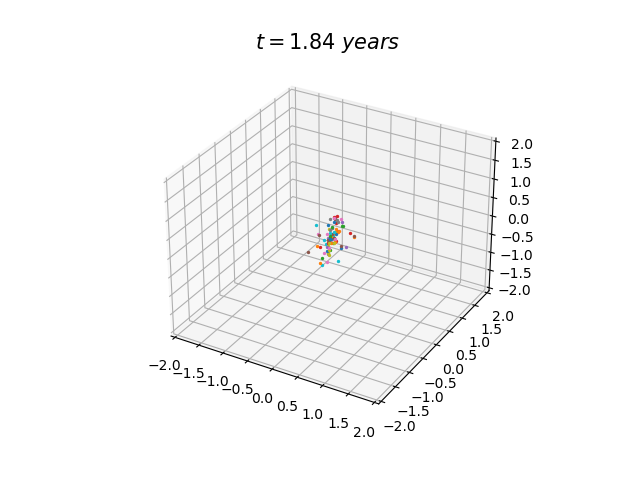

In [231]:
fig_2 = plt.figure()
ax_2 = fig_2.add_subplot(111, projection='3d')


def init_2():
    ax_2.set_xlim(-Limits[0],Limits[0])
    ax_2.set_ylim(-Limits[1],Limits[1])
    ax_2.set_zlim(-Limits[2],Limits[2])

def Update_2(i):
    
    plot = ax_2.clear()
    init_2()
    plot = ax_2.set_title(r'$t=%.2f \ years$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetPositionVector()[i,0]
        y = p.GetPositionVector()[i,1]
        z = p.GetPositionVector()[i,2]
        
        #vx = p.GetVelocityVector()[i,0]
        #vy = p.GetVelocityVector()[i,1]
        #vz = p.GetVelocityVector()[i,2]
        
        ax_2.scatter(x, y, z, zdir='z', s=p.GetR())
        
        #plot = ax_2.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation_2 = anim.FuncAnimation(fig_2,Update_2,frames=len(redt),init_func=init_2)

Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation_2.save('Collisions.mp4', writer=writer_)

## a) We verify total mechanical energy conservation


In [232]:
def Conservacion_E(Particles, t):
    K_tot = np.zeros(len(t))
    U_tot = np.zeros(len(t))
    
    
    for i in range(len(Particles)):
        K_tot = K_tot + Particles[i].GetKineticEnergyVector()
        U_tot = U_tot + Particles[i].GetPotentialEnergyVector()
    
    U_tot = U_tot/2
    
    E_tot = K_tot + U_tot
    return K_tot, U_tot, E_tot

In [233]:
K, U, E = Conservacion_E(Particles, t)


<IPython.core.display.Javascript object>


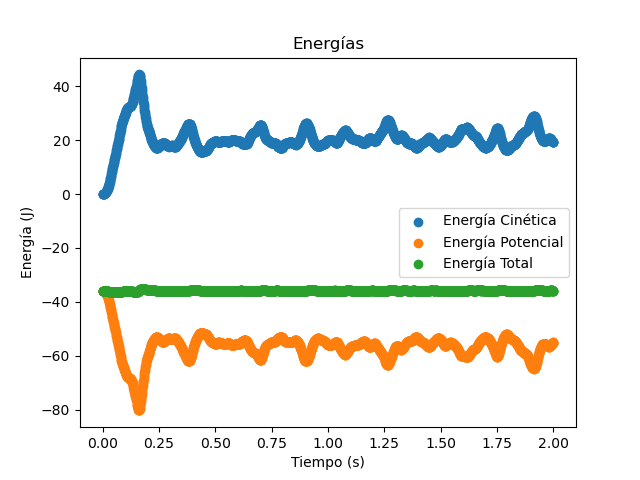

In [234]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.set_title('Energías')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Energía (J)')
#ax.set_ylim(-0.100, 0.100)
ax.scatter(t, K, label = 'Energía Cinética')
ax.scatter(t, U, label = 'Energía Potencial')
ax.scatter(t, E, label = 'Energía Total')

ax.legend()


## b) We verify linear momentum conservation and c) we verify angular momentum conservation

In [235]:
def Conservacion_p(Particles, t):
    p_tot = np.zeros((len(t),3))
    
    for i in range(len(Particles)):
        p_tot = p_tot + Particles[i].GetMomentumVector()
    
    p_x = p_tot[:,0]
    p_y = p_tot[:,1]
    p_z = p_tot[:,2]
    
    p = np.zeros(len(t))
    
    for i in range(len(p_tot)):
        p[i] = np.linalg.norm(p_tot[i])
    
    return p_x, p_y, p_z, p

In [236]:
p_x, p_y, p_z, p_tot = Conservacion_p(Particles, t)

In [237]:
def Conservacion_L(Particles, t):
    L_tot = np.zeros((len(t),3))
    
    for i in range(len(Particles)):
        L_tot = L_tot + Particles[i].GetAngularMomentumVector()
    
    L_x = L_tot[:,0]
    L_y = L_tot[:,1]
    L_z = L_tot[:,2]
    
    L = np.zeros(len(t))
    
    for i in range(len(p_tot)):
        L[i] = np.linalg.norm(L_tot[i])
    
    return L_x, L_y, L_z, L

In [238]:
L_x, L_y, L_z, L_tot = Conservacion_L(Particles, t)

<IPython.core.display.Javascript object>


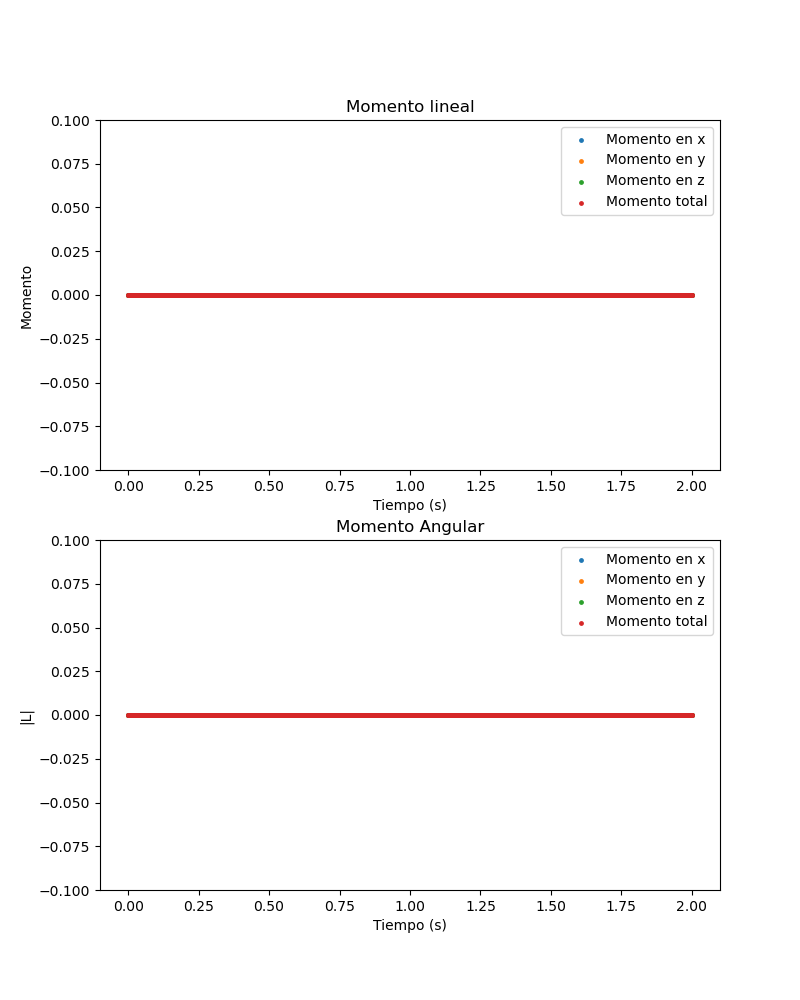

In [239]:
fig = plt.figure(figsize=(8, 10))

ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

ax.set_title('Momento lineal')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Momento')
ax.set_ylim(-0.100, 0.100)
ax.scatter(t, p_x, label = 'Momento en x', s = 6)
ax.scatter(t, p_y, label = 'Momento en y', s = 6)
ax.scatter(t, p_z, label = 'Momento en z', s = 6)
ax.scatter(t, p_tot, label = 'Momento total', s = 6)

ax.legend()

ax1.set_title('Momento Angular')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('|L|')
ax1.set_ylim(-0.100, 0.100)
ax1.scatter(t, L_x, label = 'Momento en x', s = 6)
ax1.scatter(t, L_y, label = 'Momento en y', s = 6)
ax1.scatter(t, L_z, label = 'Momento en z', s = 6)
ax1.scatter(t, L_tot, label = 'Momento total', s = 6)

ax1.legend()




[1. 1. 1.]
